# Python Programming: Bayesian Estimation Exercise

## Examples

In [ ]:
# Example 1
# ---
# Determine the bias of a Thumbtack 
# (A thumbtack is a short flat-headed pin, used for fastening paper to a wall or other surface.)
# ---
# 

# We shall use the excellent PyMC library. Let's install it
# We shall avoid going into the finer details of PyMC. Excellent documentation for PyMC 
# can be found both in the PyMC docs as well as the book "Probabilistic Programming and Bayesian methods for Hackers" 
# by Cam Davidson-Pilon's, which can be found online at 
# http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/.
!pip install pymc

     |████████████████████████████████| 385 kB 5.2 MB/s 
  Created wheel for pymc: filename=pymc-2.3.8-cp37-cp37m-linux_x86_64.whl size=1361128 sha256=336676454a06d5aa3cdc7e862feff0a02bd118906c2051bec77da5fe032f269e
  Stored in directory: /root/.cache/pip/wheels/3b/9b/1d/2a2ddbe80519db2698745f0988ce50c36ad38aac886a4ee0ca
Successfully built pymc


In [ ]:
# For estimating theta, we shall first generate 30 samples from the Bernoulli distribution, 
# where the controlling parameter has a value of 0.3 
# (which would correspond to roughly 30% of the generated values being 1, and the rest being 0).

# Importing the libraries we will need
from pymc import *
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import pymc.Matplot as plott


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# We attempt to find the parameters of the posterior distribution, and we've learnt that the posterior depends on the prior, as well the data. 
# There are many choices of prior available to us, in this case we shall use the uniform prior. 
# Since we have little idea about the bias of the thumbtack, we believe it can lie anywhere between 0 and 1.
# The PyMC model contains two variables. The first is a Uniform prior, which represents our belief 
# that the value of the parameter can be anywhere between 0 and 1. 
# The second is the Bernoulli variable, to which we provide data. The two variables are linked in a parent-child relationship, 
# the Uniform prior is the designated parent of the Bernoulli variable.
# We use two types of PyMC variables: Stochastic (the uni_prior variable, which can take different values based on the parameter theta). 
# Deterministic (such as 'bern', whose values are decided by its parents). Finally, all the variables in the model are wrapped in a Model object.
# For all variables where observed is not True, PyMC's simulations will tickle the value of the variable during the simulation 
# and the value (of uni_prior in our case) will start to approximate its posterior values.

from pymc import *
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import pymc.Matplot as plott

# Samples drawn from the prior distribution show that the prior is uniformly distributed between 0 and 1 on the x axis.
def create_model(data):
    #create a uniform prior, the lower and upper limits of which are 0 and 1
    uni_prior = Uniform('uni_prior', lower=0,upper=1.0 )
    bern = Bernoulli('bern',p=uni_prior, value=data,observed=True)
    model=Model([uni_prior,bern])
    return model

/usr/local/lib/python3.7/dist-packages/pymc/MCMC.py:81: UserWarning: Instantiating a Model object directly is deprecated. We recommend passing variables directly to the Model subclass.
  warnings.warn(message)


 [-----------------100%-----------------] 5000 of 5000 complete in 0.3 secGenerating histogram of uni_prior


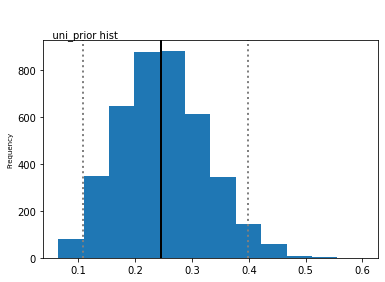

In [ ]:
# We now use a sampling method called Markov Chain Monte Carlo (hence the acronym MCMC). 
# MCMC is one of the methods used to draw samples from the posterior distribution. 
# We draw 5k samples, and draw a histogram of the samples (called traces in MCMC parlance).
# In Bayesian statistics, the parameter theta is represented as a random variable and not a single value.

sample_size=30

def get_traces(sample_size):
    data=bernoulli.rvs(0.3,size=sample_size)
    model=create_model(data)
    model.seed()
    mc1 = MCMC(model)
    mc1.sample(iter=5000,burn=1000)
    return mc1,mc1.trace('uni_prior')[:]

mc1,traces=get_traces(sample_size)
plott.histogram(traces,"uni_prior")


# We plot the posterior distribution of the parameter theta. We can see that the distribution has quite a bit of variance, 
# and the peak of the distribution (indicated by a black vertical line) 
# does not correspond to 0.3 (which is the true value of the parameter theta). 
# The peak of the distribution hill is called a point estimate in Bayesian parlance, 
# which is analogous to the "best estimate" if we want to represent the parameter theta as a single value.

/usr/local/lib/python3.7/dist-packages/pymc/MCMC.py:81: UserWarning: Instantiating a Model object directly is deprecated. We recommend passing variables directly to the Model subclass.
  warnings.warn(message)


 [-----------------100%-----------------] 5000 of 5000 complete in 0.2 secGenerating histogram of num samples = 20


/usr/local/lib/python3.7/dist-packages/pymc/MCMC.py:81: UserWarning: Instantiating a Model object directly is deprecated. We recommend passing variables directly to the Model subclass.
  warnings.warn(message)


 [-----------------100%-----------------] 5000 of 5000 complete in 0.3 secGenerating histogram of num samples = 50


/usr/local/lib/python3.7/dist-packages/pymc/MCMC.py:81: UserWarning: Instantiating a Model object directly is deprecated. We recommend passing variables directly to the Model subclass.
  warnings.warn(message)


 [-----------------100%-----------------] 5000 of 5000 complete in 0.3 secGenerating histogram of num samples = 100


/usr/local/lib/python3.7/dist-packages/pymc/MCMC.py:81: UserWarning: Instantiating a Model object directly is deprecated. We recommend passing variables directly to the Model subclass.
  warnings.warn(message)


 [-----------------100%-----------------] 5000 of 5000 complete in 0.3 secGenerating histogram of num samples = 500


/usr/local/lib/python3.7/dist-packages/pymc/MCMC.py:81: UserWarning: Instantiating a Model object directly is deprecated. We recommend passing variables directly to the Model subclass.
  warnings.warn(message)


 [-----------------100%-----------------] 5000 of 5000 complete in 0.9 secGenerating histogram of num samples = 5000


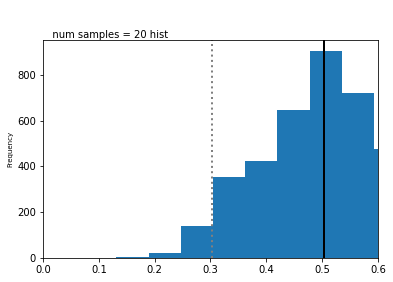

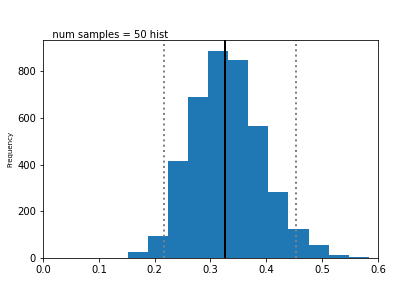

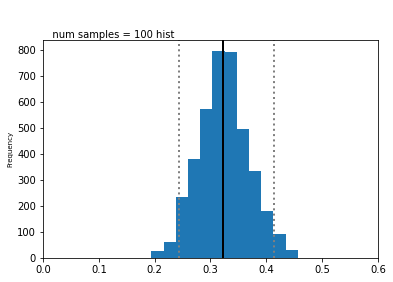

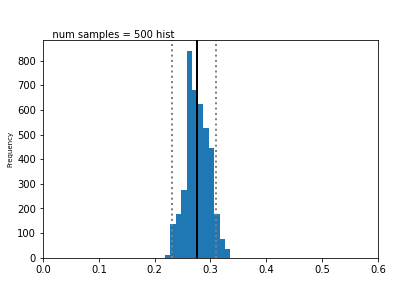

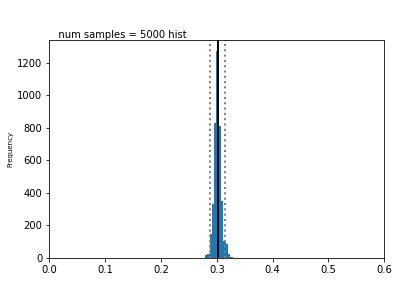

In [ ]:
# We then plot the posterior distribution for an increasing number of samples.
num_samples=[20,50,100,500,5000]
for i in num_samples:
    m,traces=get_traces(i)
    plott.histogram(traces,"num samples = "+str(i),datarange=(0,0.6))
    
# We can see that increasing the number of samples makes the distribution "hill" sharper, 
# which indicates its growing confidence in its estimate of the parameter theta.

In [ ]:
# Example 2
# ---
# I tossed my coin 30  times, and it came up as heads  11  times. Is it biased?
# ---
# 

# Parameterized problem:
#
# "I want to know  p , the probability of tossing heads. Given  n  tosses and  h  observed heads, 
# is it probable that the value of  p  is close to  0.5  , say, in the interval  [0.48,0.52] ?"

# Prior:
# prior belief about parameter:  p∼Uniform(0,1) 
# likelihood function:  data∼Bernoulli(p)

In [ ]:
# Make the data needed for the problem.
from random import shuffle
total = 30
n_heads = 11
n_tails = total - n_heads
tosses = [1] * n_heads + [0] * n_tails
shuffle(tosses)

# printing out data
print(tosses)

[0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0]


In [ ]:
# Creating a function to plot our tosses
from collections import Counter
def plot_coins():
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.bar(list(Counter(tosses).keys()), list(Counter(tosses).values()))
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['tails', 'heads'])
    ax.set_ylim(0, 20)
    ax.set_yticks(np.arange(0, 21, 5))
    return fig

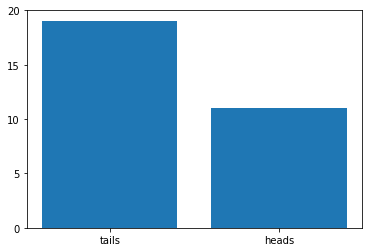

In [ ]:
# Plotting
fig = plot_coins()
plt.show()    

In [ ]:
# Context manager syntax. `coin_model` is **just** 
# a placeholder
# 
import pymc3 as pm
with pm.Model() as coin_model: 
    # Distributions are PyMC3 objects.
    # Specify prior using Uniform object.
    p_prior = pm.Uniform('p', 0, 1)  
    
    # Specify likelihood using Bernoulli object.
    like = pm.Bernoulli('likelihood', p=p_prior, 
                        observed=tosses)  
                        # "observed=data" is key
                        # for likelihood.

In [ ]:
# Writing our model in PyMC3, hitting the MCMC Inference Button (TM)
# 
with coin_model:
    # don't worry about this:
    step = pm.Metropolis()
    
    # focus on this, the Inference Button:
    coin_trace = pm.sample(2000, step=step)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Sequential sampling (2 chains in 1 job)
Metropolis: [p]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 2 seconds.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  This is separate from the ipykernel package so we can avoid doing imports until
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


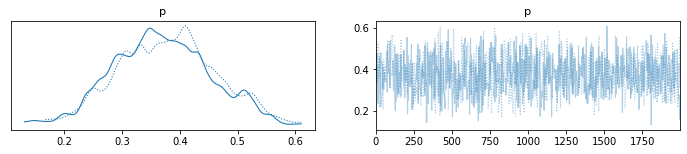

In [ ]:
# Results
# 
pm.traceplot(coin_trace)
plt.show()

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


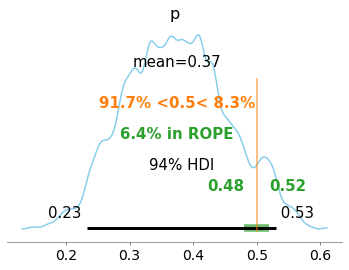

In [ ]:
# Interpreting based on posterior distributions
# 
pm.plot_posterior(coin_trace[100:], color='#87ceeb', 
                  rope=[0.48, 0.52], point_estimate='mean', 
                  ref_val=0.5)
plt.show()

# 95% highest posterior density (HPD) encompasses the region of practical equivalence (ROPE) 
# thus we need to get more data. For more info (http://bit.ly/HPDandROPE)

## <font color="green">Challenges</font>

In [ ]:
# Challenge 1
# ---
# I tossed my coin 50  times, and it came up as tails 29  times. Is it biased?
# --
# 
OUR CODE GOES HERE

In [ ]:
# Challenge 2
# ---
# Assume that we run an website for selling safari shoes and in order to bring people to our site, 
# we deploy several digital marketing campaigns. 
# These campaigns feature various ad images and captions, and are presented on a number of social networking websites. 
# We want to present the ads that are the most successful. 
# For the sake of simplicity, we can assume that the most successful campaign 
# is the one that results in the highest click-through rate: the ads that are most likely to be clicked if shown.
# We introduce a new campaign called "facebook-yellow-dress," a campaign presented to Facebook users featuring a yellow dress. 
# The ad has been presented to 10 users so far, and 7 of the users have clicked on it. 
# Determine the probability that the next user will click on the ad.
# --
OUR CODE GOES HERE